In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns 
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from scipy import stats
from scipy.stats import norm
import warnings
warnings.filterwarnings('ignore')

In [36]:
test = pd.read_csv('test_house_prices.csv')
train = pd.read_csv('train_house_prices.csv')

In [37]:
train.shape, test.shape

((1460, 81), (1459, 80))

In [38]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [39]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [40]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [41]:
train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

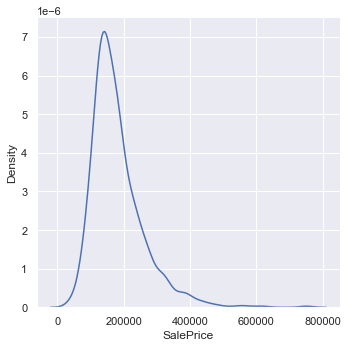

In [42]:
sns.displot(train['SalePrice'], kind="kde")

the SalePrice distribution is positively skewed

In [43]:
#skewness and kurtosis
print("Skewness: %f" % train['SalePrice'].skew())
print("Kurtosis: %f" % train['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


In [44]:
#numerical features
numerical_features = train.select_dtypes(include=['float64', 'int64']).columns.to_list()
print("number of numerical features", len(numerical_features))
print(numerical_features)

number of numerical features 38
['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


### Correlation

<AxesSubplot:>

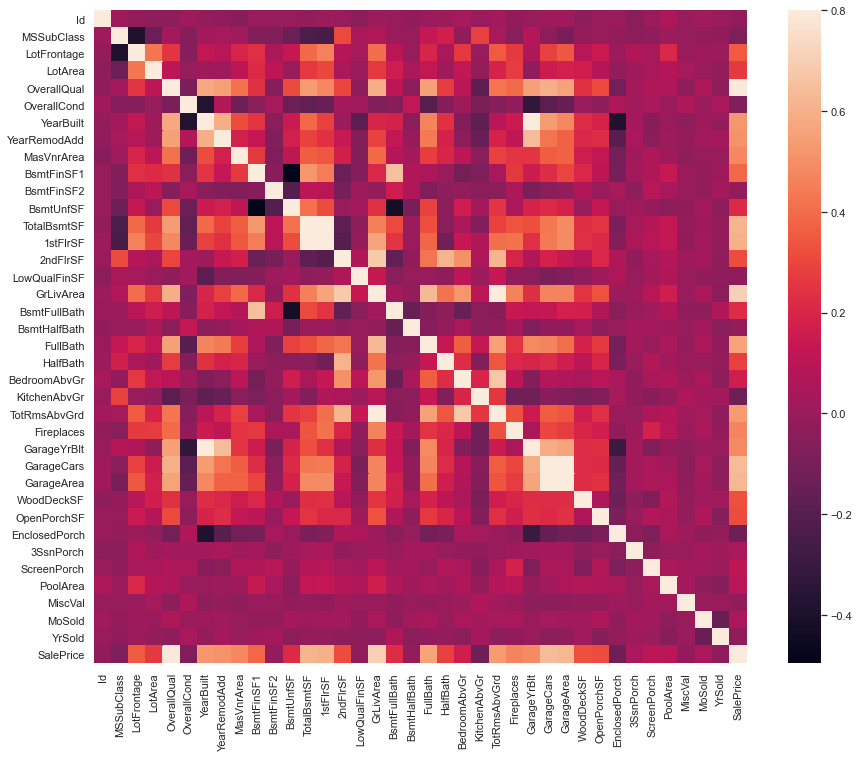

In [45]:
#correlation matrix
corrmat = train.corr()
f, ax = plt.subplots(figsize=(15, 12))
sns.heatmap(corrmat, vmax=.8, square=True)

In the heatmap correlation between the SalePrice, the OverallQual and GrLivArea square have a bright color. Then the ones that are slightly bright are also TotalBsmtSF, 1stFlrSF, FullBath, TotRmsAbvGrd, GarageCars and GarageArea. We can find out more about the correlation between the SalePrice and these variables. The YearBuilt is also bright, but we don't use this variable right now because there must be additional analysis related to time series and inflation.

### SalePrice Correlation Matrix

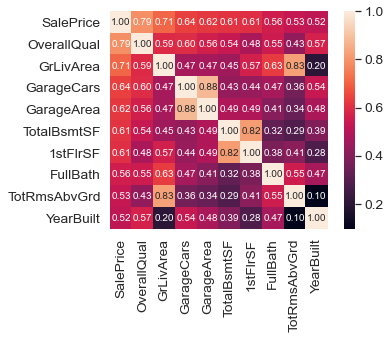

In [46]:
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

- OverallQual and GrLivArea (Above ground living area) have a strong correlation with SalePrice.
- GarageCars and GarageArea also have strong correlation with SalePrice. These two variables itself are also strongly correlated. We keep the GarageCars only for analysis (since its correlation with SalePrice is higher).
- Also for the TotalBsmtSF (Total square feet of basement area) and 1stFlrSF (First Floor square feet) are strongly correlated. These two variables also have a strong correlation with SalePrice. We keep TotalBsmtSF for analysis.
- And for this analysis we also take out YearBuilt because we assume that people tend to buy new house than the old one. The YearBuilt is also more related to inflation (so, this would be need a time-series analysis).
- We will see the linear relationship between the most correlated variables with scatter plot in next eploration.

### Scatter plot to see the linear relationship

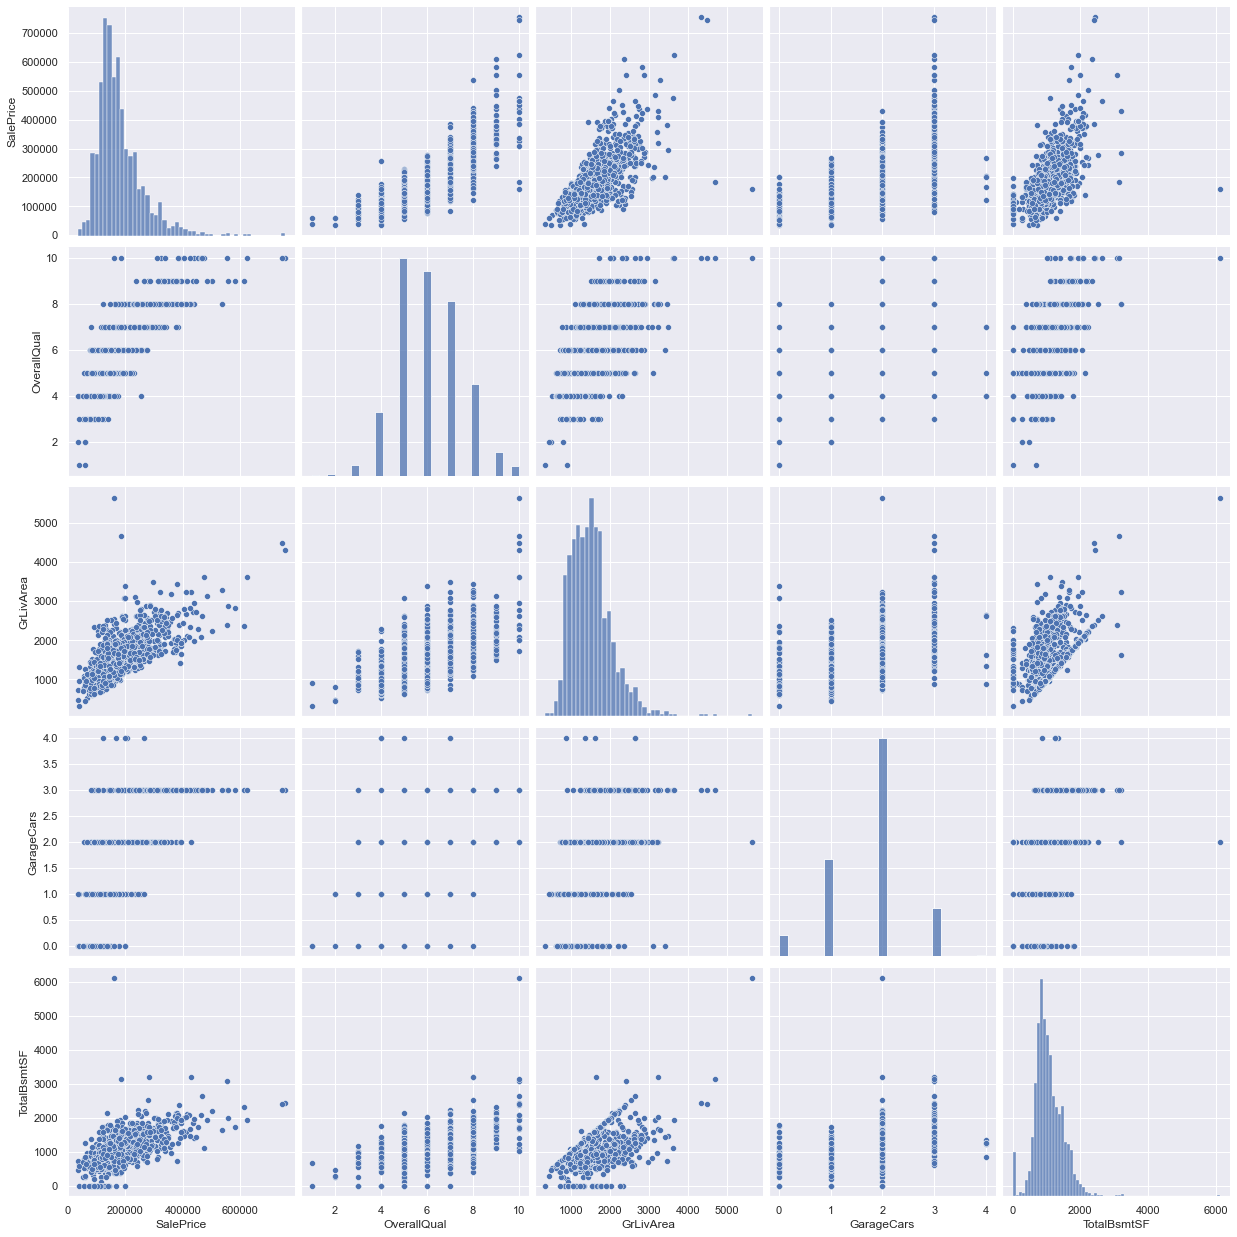

In [47]:
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars',
        'TotalBsmtSF']
sns.pairplot(train[cols], height = 3.5)
plt.show()

In [48]:
#missing value
total = train.isnull().sum().sort_values(ascending = False)
percent = (total/train.isnull().count())
missing_value = pd.concat([total, percent], axis = 1, keys = ['total', 'pecent'])
missing_value.head(30)

,total,pecent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


- According to table above, we can consider variable PoolQC, MiscFeature, Alley, Fence and FireplaceQu to be deleted. We can say that these variables are not a consideration for every buyers to buy a house.
- We can see that the Garage and the Bsmt things have same number of missing values respectively. We can also delete it since the important information already expressed by GarageArea and TotalBsmtSF.
- MasVnrArea and MasVnrType (masonry veneer) has a strong correlation with OverallQuall which is already considered as an essential variable, so we can also delete these variables.

In [49]:
#drop the missing values
train = train.drop((missing_value[missing_value['total'] >= 1]).index, 1)
train.isnull().sum().max()
#df_train = df_train.drop(df_train.loc[df_train['Electrical'].isnull()].index)

0

### Outliers detection

- We already see the outliers on the scatterplot in the previous kernel
- We can also check with IQR Score

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

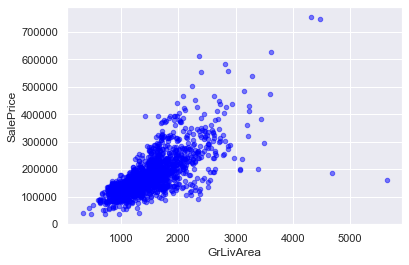

In [50]:
data = pd.concat([train['GrLivArea'], train['SalePrice']], axis=1)
data.plot.scatter(x='GrLivArea', y='SalePrice', color="blue", alpha=0.5)

Information from data desciption: GrLivArea= Above grade (ground) living area square feet. 
In real estate, above grade means the portion of a home that is above the ground. The term is usually used to describe a room or square footage. For example, 3 bedrooms above grade means 3 bedrooms that are not in a basement.
There are 2 strange numbers between value 4000 and 6000 on GrLivArea, meaning that the bigger the GrLivArea is, the cheaper the SalePrice (or not following the trend). We will delete these outliers.

In [51]:
train.sort_values(by = 'GrLivArea', ascending = False)[:2]

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1298,1299,60,RL,63887,Pave,IR3,Bnk,AllPub,Corner,Gtl,...,0,0,0,480,0,1,2008,New,Partial,160000
523,524,60,RL,40094,Pave,IR1,Bnk,AllPub,Inside,Gtl,...,0,0,0,0,0,10,2007,New,Partial,184750


In [52]:
train = train.drop(train[train['Id'] == 1299].index)
train = train.drop(train[train['Id'] == 524].index)

<AxesSubplot:xlabel='TotalBsmtSF', ylabel='SalePrice'>

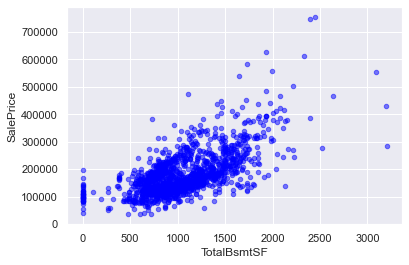

In [53]:
data= pd.concat([train['SalePrice'], train['TotalBsmtSF']], axis=1)
data.plot.scatter(x='TotalBsmtSF', y='SalePrice', color="blue", alpha=0.5)

### Normalize the distribution

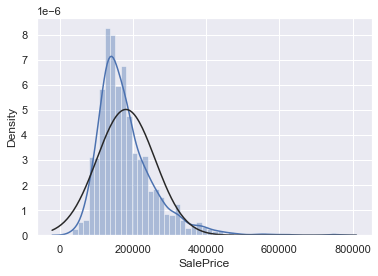

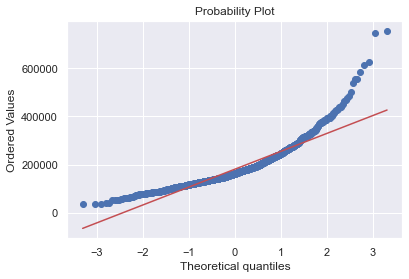

In [54]:
#SalePrice distribution
sns.distplot(train['SalePrice'], fit= norm)
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot= plt)

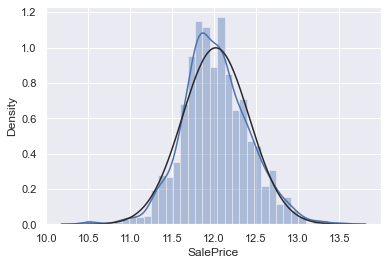

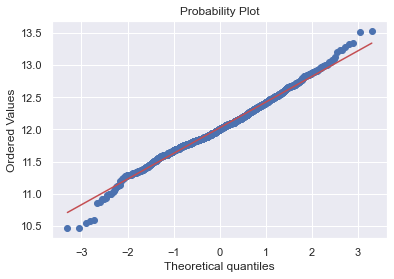

In [55]:
#Normalize the distribution
#log transformation
train['SalePrice'] = np.log1p(train['SalePrice'])

#visualization
sns.distplot(train['SalePrice'], fit=norm)
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)

Now the SalePrice is already normal

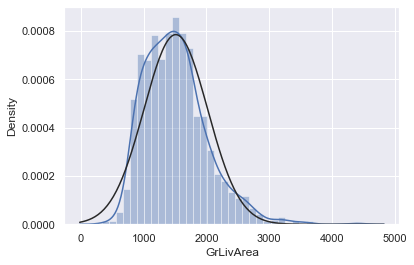

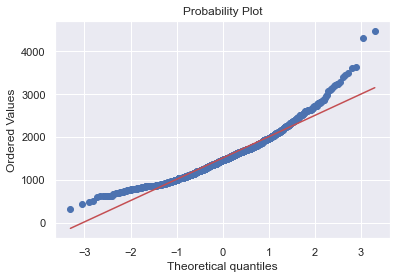

In [56]:
#GrLivArea distribution
sns.distplot(train['GrLivArea'], fit= norm)
fig = plt.figure()
res = stats.probplot(train['GrLivArea'], plot= plt)

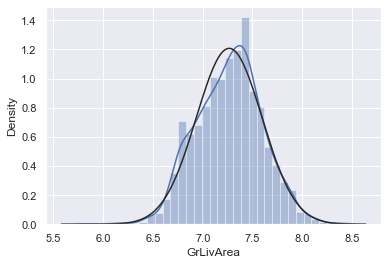

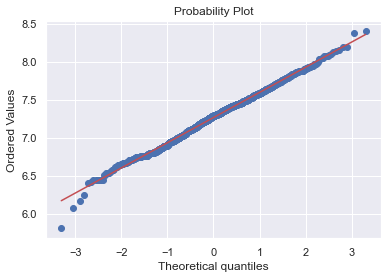

In [57]:
#Normalize the distribution
#log transformation
train['GrLivArea'] = np.log(train['GrLivArea'])

#visualization
sns.distplot(train['GrLivArea'], fit=norm)
fig= plt.figure()
res= stats.probplot(train['GrLivArea'], plot=plt)

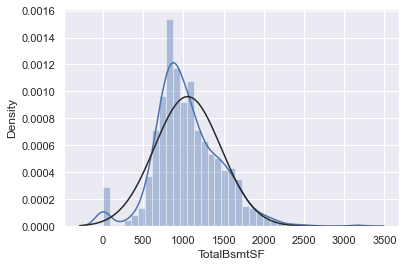

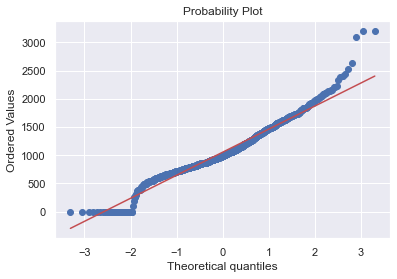

In [58]:
#TotalBsmtSF distribution
#'SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea','TotalBsmtSF', 'FullBath', 'TotRmsAbvGrd'
sns.distplot(train['TotalBsmtSF'], fit= norm)
fig = plt.figure()
res = stats.probplot(train['TotalBsmtSF'], plot= plt)

In [59]:
#create column for new variable (binary categorical)
#if area>0 it gets 1, if area==0 it gets 0
train['Basement'] = pd.Series(len(train['TotalBsmtSF']), index=train.index)
train['Basement'] = 0 
train.loc[train['TotalBsmtSF']>0,'Basement'] = 1

In [60]:
#transform data
train.loc[train['Basement']==1,'TotalBsmtSF'] = np.log(train['TotalBsmtSF'])

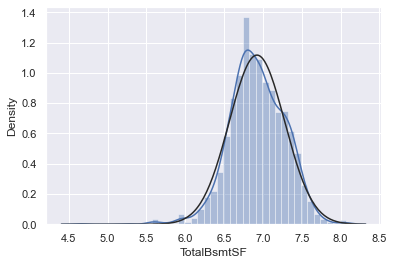

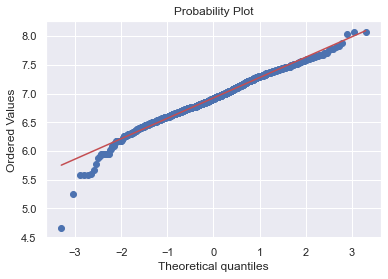

In [61]:
#histogram and normal probability plot
sns.distplot(train[train['TotalBsmtSF']>0]['TotalBsmtSF'], fit=norm)
fig = plt.figure()
res = stats.probplot(train[train['TotalBsmtSF']>0] ['TotalBsmtSF'], plot=plt)

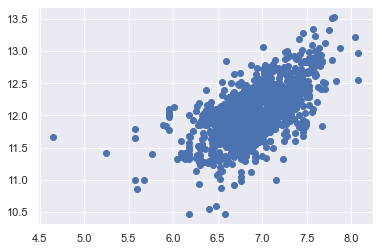

In [62]:
plt.scatter(train[train['TotalBsmtSF']>0] ['TotalBsmtSF'], train[train['TotalBsmtSF']>0]['SalePrice'])

In [63]:
#convert categorical into dummy
train = pd.get_dummies(train)
train.head()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,8450,7,5,2003,2003,706,0,150,...,0,0,0,1,0,0,0,0,1,0
1,2,20,9600,6,8,1976,1976,978,0,284,...,0,0,0,1,0,0,0,0,1,0
2,3,60,11250,7,5,2001,2002,486,0,434,...,0,0,0,1,0,0,0,0,1,0
3,4,70,9550,7,5,1915,1970,216,0,540,...,0,0,0,1,1,0,0,0,0,0
4,5,60,14260,8,5,2000,2000,655,0,490,...,0,0,0,1,0,0,0,0,1,0


In [64]:
X = train[['OverallQual', 'GrLivArea', 'GarageCars','TotalBsmtSF']]
y = train['SalePrice']

### Splitting training and test set

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=0)

### Fitting into training

In [66]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

### Predict the result

In [67]:
y_pred = model.predict(X_test)

### Plot the result

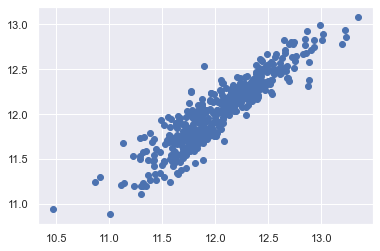

In [68]:
pred = model.predict(X_test)
plt.scatter(y_test, pred)

### Model Evaluation

In [69]:
#model evaluation
r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)
mse = 1/len(X_test) * np.sum((y_pred - y_test)**2)
mae = 1/len(X_test) * np.sum(np.abs(y_pred - y_test))


#printing values
print('Slope:' ,model.coef_)
print('Intercept:',model.intercept_)
print('R-Squared: ', r2)
print('RMSE: ', rmse)
print('MAE : ', mae)
print('MSE : ', mse)

Slope: [0.13016414 0.40089994 0.12027854 0.03721385]
Intercept: 7.85433231920677
R-Squared:  0.833925025910964
RMSE:  0.027121346334760925
MAE :  0.12864697932824104
MSE :  0.02712134633476093


### Linear regression with statsmodel

In [70]:
import statsmodels.api as sm
from scipy import stats

In [71]:
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     1504.
Date:                Sat, 10 Apr 2021   Prob (F-statistic):               0.00
Time:                        21:43:39   Log-Likelihood:                 462.04
No. Observations:                1458   AIC:                            -914.1
Df Residuals:                    1453   BIC:                            -887.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           7.8543      0.119     65.756      